In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time

In [2]:
from sklearn.datasets import make_blobs

In [3]:
X, y = make_blobs(n_samples=300, n_features=2, centers=5, cluster_std=2, random_state=32)

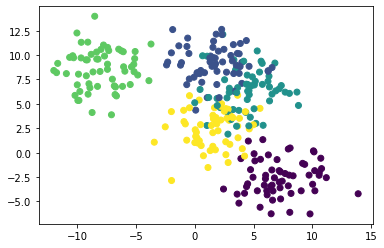

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=y);

In [5]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=32)

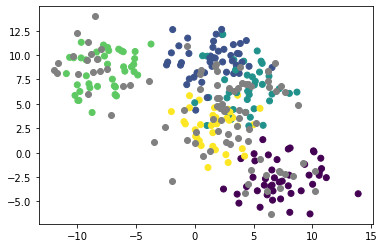

In [6]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c='grey');

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
knn = KNeighborsClassifier(n_neighbors=5)

In [9]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [10]:
predictions = knn.predict(X_test)

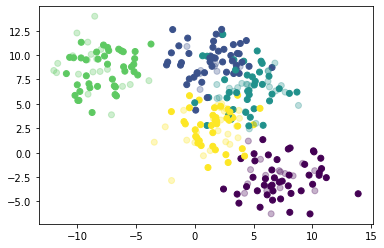

In [11]:
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.scatter(X_test[:, 0], X_test[:, 1], c=predictions,  alpha=0.3);

### 1. Compute accuracy of the baseline

In [12]:
startSklearn = time.time()

kNNClassifier = KNeighborsClassifier(5).fit(X_train,y_train)
kNNClassifier.predict(X_test)
baseline = kNNClassifier.score(X_test, y_test)

endSklearn = time.time()
print('The baseline 5-NN classification accuracy with sklearn is :',baseline)

The baseline 5-NN classification accuracy with sklearn is : 0.8444444444444444


### 2. Complete `predict_proba` method. You are allowed to use only `numpy` library and your code should work for any number of neighbours.

In [13]:
from sklearn.base import BaseEstimator

class KNearest(BaseEstimator):
    def __init__(self, n_neighbors=5):
        self.n_neighbors = n_neighbors
 
    def fit(self, X, y):
        self.X = X
        self.y = y
        return self
 
    def predict_proba(self, X):        
        _, n_classes = np.unique(self.y, return_counts=True)
        res = np.zeros((X.shape[0], len(n_classes)))
        i = 0
        for x in X:
            dist = np.linalg.norm(x - self.X, axis=1) # dist to all training samples
            #now we need to find the n closer neighboors
            neigh = self.y[np.argpartition(dist, self.n_neighbors)[0:self.n_neighbors]]
            # neigh is list of class of k closesnt nieghbours -> example : [2,3,3,3,3] -> closest is class 2, rest is class 3
            
            res[i] = np.bincount(neigh, minlength=np.bincount(y).size)/self.n_neighbors # count each classes occurrence
            # res[i] is a list of each neighbours class occurrence -> example : [0,0,1,4,0] -> 1 of class 2, 4 of class 3
            # to compute the probability we must divide by #neighbours
            # example : [0,0,1/5,4/5,0] -> 1/5 chance of being of class 2, 4/5 of being of class 3    
            i = i + 1
        return res
 
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

In [14]:
knn = KNearest(n_neighbors=5)
knn.fit(X_train, y_train)
knn.predict(X_test)

array([3, 2, 4, 2, 2, 2, 4, 2, 3, 0, 4, 3, 4, 4, 1, 3, 2, 2, 0, 4, 2, 0,
       1, 4, 3, 4, 3, 2, 4, 0, 4, 2, 1, 2, 3, 4, 3, 3, 4, 1, 4, 3, 4, 4,
       4, 1, 2, 0, 4, 4, 4, 2, 2, 3, 2, 0, 0, 3, 1, 3, 3, 4, 2, 1, 2, 3,
       0, 4, 2, 4, 2, 1, 0, 0, 3, 0, 2, 2, 3, 4, 0, 0, 3, 0, 2, 0, 3, 4,
       0, 3], dtype=int64)

### 3. Compare the accuracy of your algorithm with `sklearn` library.

In [15]:
startSklearn = time.time()

kNNClassifier = KNeighborsClassifier(5).fit(X_train,y_train)
kNNClassifier.predict(X_test)
baseline = kNNClassifier.score(X_test, y_test)

endSklearn = time.time()
print("SKLEARN LIB : ")
print()
print('The baseline 5-NN classification accuracy with sklearn is :',baseline)
print()
startSklearn = time.time()

y_pred = KNearest(5).fit(X_train,y_train).predict(X_test)
myAcc = np.count_nonzero(y_pred == y_test)/y_test.size

endSklearn = time.time()
print("MY KNN : ")
print()
print('My 5-NN classification accuracy is :',myAcc)

SKLEARN LIB : 

The baseline 5-NN classification accuracy with sklearn is : 0.8444444444444444

MY KNN : 

My 5-NN classification accuracy is : 0.8444444444444444


### 4. Compare the speed of your algorithm with `sklearn` library.

In [16]:
startSklearn = time.time()

kNNClassifier = KNeighborsClassifier(5).fit(X_train,y_train)
kNNClassifier.predict(X_test)
baseline = kNNClassifier.score(X_test, y_test)

endSklearn = time.time()
print("SKLEARN LIB : ")
print()
print('The baseline 5-NN classification Computing time', endSklearn-startSklearn)
print()
startSklearn = time.time()

y_pred = KNearest(5).fit(X_train,y_train).predict(X_test)
myAcc = np.count_nonzero(y_pred == y_test)/y_test.size

endSklearn = time.time()
print("MY KNN : ")
print()
print('My 5-NN classification Computing time', endSklearn-startSklearn)

SKLEARN LIB : 

The baseline 5-NN classification Computing time 0.00797891616821289

MY KNN : 

My 5-NN classification Computing time 0.0029916763305664062


### 5. Use `KDTree` structure for fast neighbours searching.
Compare accuracy and speed.

In [17]:
from sklearn.neighbors import KDTree
KDTree?

In [26]:
class KNearestWithKDTree(BaseEstimator):
    def __init__(self, n_neighbors=5, leaf_size=30):
        self.leaf_size = leaf_size
        self.n_neighbors = n_neighbors
 
    def fit(self, X, y):
        self.tree = KDTree(X, leaf_size=self.leaf_size)
        self.y = y
 
    def predict_proba(self, X):
        _, n_classes = np.unique(self.y, return_counts=True)
        res = np.zeros((X.shape[0], len(n_classes)))
        
        closest = self.tree.query(X, k=self.n_neighbors, return_distance=False) # returns closesnt n neighbors to our test data
        i = 0
        # for every result we compute the probability by dividing by number of neighbors jst like before
        for close in closest:
            pred = np.bincount(self.y[close], minlength= np.bincount(y).size)/self.n_neighbors
            res[i] = np.array(pred)
            i = i + 1
        return res
        
 
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)

In [27]:
startKDTree = time.time()
knn = KNearestWithKDTree()
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
endKDTree = time.time()

myAcc = np.count_nonzero(y_pred == y_test)/y_test.size
print('My 5-NN classification accuracy with kdtree is', myAcc)
print('My 5-NN classification Computing time with kdtree is', endKDTree-startKDTree)


My 5-NN classification accuracy with kdtree is 0.8444444444444444
My 5-NN classification Computing time with kdtree is 0.001995086669921875


### 6. (optional) Implement `KDTree`
If you have time and desire, you can try to implement `KDTree` algorithm.
Compare accuracy and speed.

In [ ]:
class KDTreeOwn:
    def __init__(self, X, leaf_size=30):
        """
        build tree
        """
        pass
    
    def query(self, X, k=1):
        """
        query the tree for the k nearest neighbors
        """
        pass

In [ ]:
class KNearestWithKDTreeOwn(BaseEstimator):
    def __init__(self, n_neighbors=5, leaf_size=30):
        self.leaf_size = leaf_size
        self.n_neighbors = n_neighbors
 
    def fit(self, X, y):
        self.X = X
        self.y = y
 
    def predict_proba(self, X):
        """
        return probability for each data point of belonging to each cluster
        return N x M matrix prob, where N is number of test samples and M is number of unique classes
        and prob_{ij} — probability for x_i of belonging to j cluster
        """
        _, n_classes = np.unique(self.y, return_counts=True)
        return np.zeros((X.shape[0], n_classes))
        
 
    def predict(self, X):
        return np.argmax(self.predict_proba(X), axis=1)